In [187]:
#Matplotlib Homework

#Dependencies and Setup
import random
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine all the data in one table
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [188]:
#Task 1: Eliminating Duplicate Mouse ID

#Identifying and Eliminating Duplicate Mouse ID
#All mice tend to have data for timepoints between 0 and 45 in intervals of 5. So 10 data points at most. 
#Run value counts to see which mice have >10 data points; those would be the duplicates. 

duplicates = pd.DataFrame(combined_data["Mouse ID"].value_counts())
duplicates

,Mouse ID
g989,13
o562,10
a520,10
q597,10
g791,10
...,...
t573,1
d133,1
v199,1
x226,1


In [189]:
#ID and Remove g989 from table

#Obtain Row No. for g989 mouse data
g989 = combined_data.loc[combined_data["Mouse ID"] == "g989"]
g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [190]:
#Drop the g989 data from the table, 13 rows should be dropped
combined_data_set = combined_data.drop(combined_data.index[908:920])
combined_data_set

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [191]:
#Check #Mouse ID's in the List, must be 248 now
#check = pd.DataFrame(combined_data_set["Mouse ID"].value_counts())
#check

In [192]:
#Task 2: Basic Summary Statistics Table of tumor volume for each drug tested

#Sub-Task 1: Obtain list of all drugs with tumor volumes
drug_list = combined_data_set.loc[:,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]] 
drug_list = drug_list.sort_values("Drug Regimen")

#Sub_Task 2: Obtain Summary Statistics for tumor volume by drug
avg = drug_list.groupby('Drug Regimen').mean()
med = drug_list.groupby('Drug Regimen').median()
stdev = drug_list.groupby('Drug Regimen').std()
varc = drug_list.groupby('Drug Regimen').var()
se = drug_list.groupby('Drug Regimen').sem()
se = se.drop(['Mouse ID'],axis=1)

#Sub-Task 3: Combine All Dataframes to make Summary Table
sum1 = pd.merge(avg, med, how="left", on="Drug Regimen")
sum1 = sum1.rename(columns={"Tumor Volume (mm3)_x":"Mean Vol (mm3)","Tumor Volume (mm3)_y":"Median"})
sum2 = pd.merge(sum1, stdev, how="left", on="Drug Regimen")
sum2 = sum2.rename(columns={"Tumor Volume (mm3)":"Stdev"})
sum3 = pd.merge(sum2, varc, how="left", on="Drug Regimen")
sum3 = sum3.rename(columns={"Tumor Volume (mm3)":"Variance"})
sum4 = pd.merge(sum3, se, how="left", on="Drug Regimen")
Table = sum4.rename(columns={"Tumor Volume (mm3)":"Std Error"})

#Sub-Task 4: Cleanup Formatting
Table["Mean Vol (mm3)"] = Table["Mean Vol (mm3)"].map("{:.2f}".format)
Table["Median"] = Table["Median"].map("{:.2f}".format)
Table["Stdev"] = Table["Stdev"].map("{:.2f}".format)
Table["Variance"] = Table["Variance"].map("{:.2f}".format)
Table["Std Error"] = Table["Std Error"].map("{:.2f}".format)
Table

,Mean Vol (mm3),Median,Stdev,Variance,Std Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.39,50.71,6.65,44.26,0.55
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


In [193]:
#Task 3: Generate 2 bar plots that shows #mice per time point for each treatment regimen in the study

#Sub-Task 1: Generate bar plot using pyplot

#Sub-Task 2: Generate bar plot using DataFrame.plot()

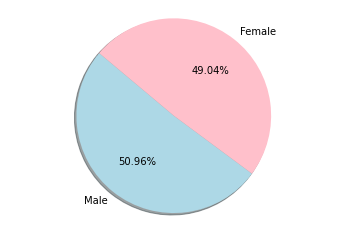

In [194]:
#Task 4: Generate 2 pie charts that shows distribution of males and females in the study

#Sub-Task 1: Generate pie chart using pyplot

#Obtain value counts for male/female mice
f_male = pd.DataFrame(combined_data_set["Sex"].value_counts())

#Construct pie chart using pyplot
labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["lightblue", "pink"]
explode = (0.1,0)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

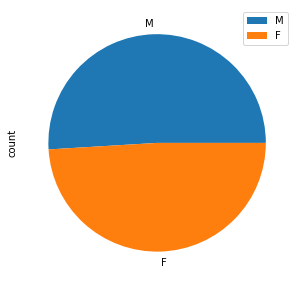

In [195]:
#Sub-Task 2: Generate pie chart using DataFrame.plot()

#Obtain value counts for male/female mice
pie_data = pd.DataFrame({'count':[958, 922],'gen':['M','F']},index=['M','F'])

#Construct pie chart using Python
plot = pie_data.plot.pie(y='count',figsize=(5,5))




In [196]:
#Task 5: Calculate final tumor volume for Capomulin, Ramicane, Infubinol, and Ceftamin. 

#Sub-Task 1: Create dataset with just final timepoint values
Final_Tumor = combined_data_set.loc[combined_data_set["Timepoint"] == 45]

#Sub-Task 2: Obtain data for final tumor volume for selected drugs
#Cleanup base table, take averages, organize from lowest to highest, isolate for selected 4 drugs
Final_Tumor = Final_Tumor[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
Final_Tumor_avg = Final_Tumor.groupby('Drug Regimen').mean()
Final_Tumor_avg = Final_Tumor_avg.sort_values('Tumor Volume (mm3)')
Final_Tumor_avg = Final_Tumor_avg.loc[(Final_Tumor_avg["Tumor Volume (mm3)"] < 65.9)]
Final_Tumor_avg

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,34.955595
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562


In [197]:
#Task 5 cont'd: Get Quartiles/IQR

#Sub-Task 1: Sort dataset by drug regimen
Final_Tumor = Final_Tumor.sort_values('Drug Regimen')

#Sub-Task 2: Isolate drug regimens of choice
Ramicane = Final_Tumor.loc[(Final_Tumor["Drug Regimen"] == "Ramicane")]
Capomulin = Final_Tumor.loc[(Final_Tumor["Drug Regimen"] == "Capomulin")]
Ceftamin = Final_Tumor.loc[(Final_Tumor["Drug Regimen"] == "Ceftamin")]
Infubinol = Final_Tumor.loc[(Final_Tumor["Drug Regimen"] == "Infubinol")]

#Sub-Task 3: Run quartile calcs
Ram_quart = Ramicane.quantile([0.25,0.5,0.75])
print(f"Ramicane {Ram_quart}")
Cap_quart = Capomulin.quantile([0.25,0.5,0.75])
print(f"Capomulin {Cap_quart}")
Cef_quart = Ceftamin.quantile([0.25,0.5,0.75])
print(f"Ceftamin {Cef_quart}")
Inf_quart = Infubinol.quantile([0.25,0.5,0.75])
print(f"Infubinol {Inf_quart}")

#Sub-Task 4: Run IQR calcs
Ramicane_IQR = 38.51 - 30.98
print(f"Ramicane IQR is {round(Ramicane_IQR,2)}")
Capomulin_IQR = 40.16 - 32.38
print(f"Capomulin IQR is {round(Capomulin_IQR,2)}")
Ceftamin_IQR = 67.53 - 61.43
print(f"Ceftamin IQR is {round(Ceftamin_IQR,2)}")
Infubinol_IQR = 67.69 - 62.75
print(f"Infubinol IQR is {round(Infubinol_IQR,2)}")



Ramicane       Tumor Volume (mm3)
0.25           30.981175
0.50           34.848627
0.75           38.508305
Capomulin       Tumor Volume (mm3)
0.25           32.377357
0.50           37.311846
0.75           40.159220
Ceftamin       Tumor Volume (mm3)
0.25           61.433892
0.50           64.299830
0.75           67.527482
Infubinol       Tumor Volume (mm3)
0.25           62.754451
0.50           66.083066
0.75           67.685569
Ramicane IQR is 7.53
Capomulin IQR is 7.78
Ceftamin IQR is 6.1
Infubinol IQR is 4.94


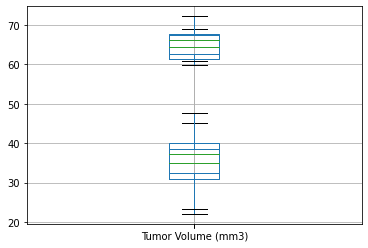

In [248]:
#Task 6: Use Matplotlib box/whisker plots to highlight any outliers from Task #5

#Final_Tumor
#Assemble all the final tumor volumes side by side for boxplot comparison
Ramicane_Data = Final_Tumor.loc[Final_Tumor["Drug Regimen"] == "Ramicane"]
Capomulin_Data = Final_Tumor.loc[Final_Tumor["Drug Regimen"] == "Capomulin"]
Ceftamin_Data = Final_Tumor.loc[Final_Tumor["Drug Regimen"] == "Ceftamin"]
Infubinol_Data = Final_Tumor.loc[Final_Tumor["Drug Regimen"] == "Infubinol"]

boxplot = Ramicane_Data.boxplot(column=['Tumor Volume (mm3)'])
boxplot = Capomulin_Data.boxplot(column=['Tumor Volume (mm3)'])
boxplot = Ceftamin_Data.boxplot(column=['Tumor Volume (mm3)'])
boxplot = Infubinol_Data.boxplot(column=['Tumor Volume (mm3)'])
boxplot

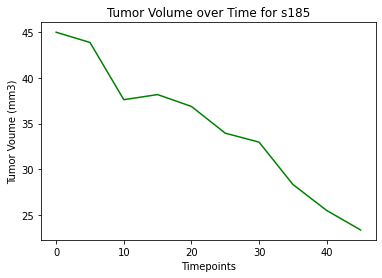

In [199]:
#Task 7: For Capomulin, generate line plot of time point vs. tumor volume for a single mouse

#Sub-Task 1: Create subset of combined dataset for just Capomulin regimen
Capomulin_Mice = combined_data_set.loc[combined_data_set["Drug Regimen"] == 'Capomulin']

#Sub-Task 2: Pick one mouse to trend
s185 = Capomulin_Mice.loc[Capomulin_Mice["Mouse ID"] == 's185']

#Sub-Task 3: Create list for Mouse ID: s185
Time = [0,5,10,15,20,25,30,35,40,45]
Tumor = [45, 43.88, 37.61, 38.17, 36.87, 33.94, 32.96, 28.32, 25.47, 23.34]

#Sub-Task 4: Create line plot
Timeline = plt.plot(Time, Tumor, color="green", label="Timepoint")
plt.ylabel('Tumor Voume (mm3)')
plt.xlabel('Timepoints')
plt.title('Tumor Volume over Time for s185')
plt.show() 

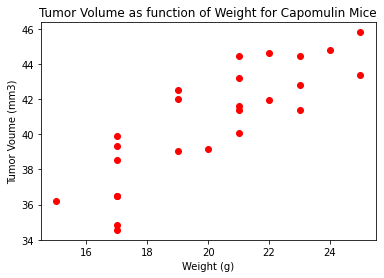

In [200]:
#Task 8: For Capomulin, generate scatter plot of mouse weight vs. tumor volume

#Sub-Task 1: Simplify the Capomulin Mice Data for Scatter Plot (ensure 1 line item per mouse)
Capomulin_Avg = Capomulin_Mice.groupby(['Mouse ID','Tumor Volume (mm3)']).mean()
Capomulin_Simp = Capomulin_Mice.loc[:,["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
Capomulin_Simp = Capomulin_Simp.groupby('Mouse ID').mean()

#Sub-Task 2: Construct Scatter Plot from Dataframe
plt.scatter(Capomulin_Simp["Weight (g)"], Capomulin_Simp["Tumor Volume (mm3)"], color='red')
plt.ylabel('Tumor Voume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Tumor Volume as function of Weight for Capomulin Mice')
plt.show()

In [201]:
#Task 9: Get correlation coefficient and linear regression model for Task #8.  
weight = Capomulin_Simp.iloc[:,0]
tumor = Capomulin_Simp.iloc[:,1]
correlation = st.pearsonr(weight,tumor)
print(f"Correlation between weight and tumor volume for mice treated with Capomulin is {round(correlation[0],2)}")

Correlation between weight and tumor volume for mice treated with Capomulin is 0.84


The r-squared is: 0.7088568047708717


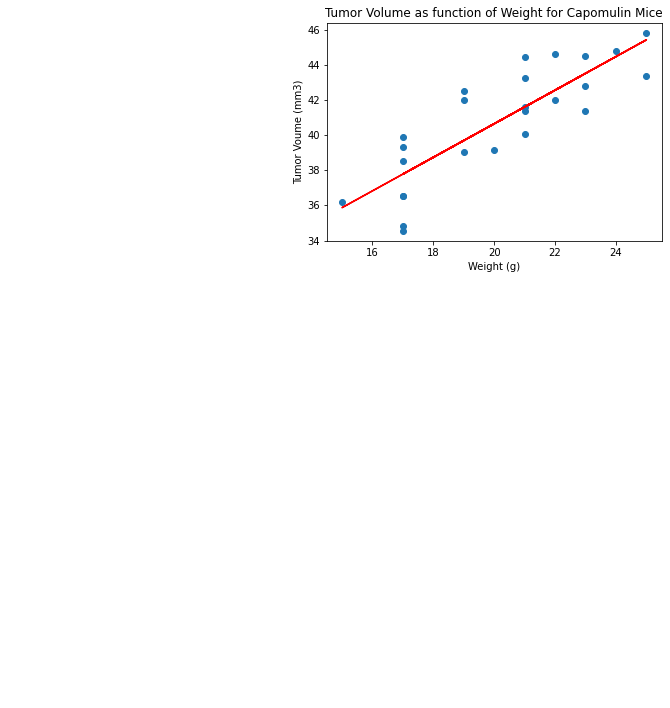

In [202]:
#Task 9 cont'd: Put regression model on scatter plot from Task #8
x_values = Capomulin_Simp['Weight (g)']
y_values = Capomulin_Simp['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,8),fontsize=15,color="blue")
plt.ylabel('Tumor Voume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Tumor Volume as function of Weight for Capomulin Mice')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [203]:
#Task 10: Write 3 observations based on data/charts above

#Observation 1:
#Of all treatments, the Capomulin and Ramicane were the most effective in terms of reducing tumor size.
#Both were the only drugs to reduce tumor size from 45 mm3 to ~40-41 mm3. For other drugs/placebo, tumor size rose.
#Both drugs also drew results with the lowest variance in data as seen in their var/stdev numbers of all drugs. 

#Observation 2:
#Capomulin treatment seemed to show a very strong correlation with mice weight. The higher the weight, the higher
#the tumor volume on average with an r2 of 71%, this is a strong correlation suggesting that Capomulin might be an
#effective treatment for lighter mice than heavier mice. 

#Observation 3:
#Additional work needs to be done to fully prove Capomulin is the most effective SCC drug regimen. Ramicane, arguably
#is marginally better than Capomulin in terms of reducing tumor size and its data variance. This could mean possibly
#re-formulating the drug, doing trials for longer timepoints, focusing on lighter mice etc. 